# Map each limiting factor gloably and in the Arctic for wach phytoplankton to understand better its thresholds. 
    
#### __I want to understand the range of values for the light limiation terms. the temperature limitation terms, and the temperature limiation terms to understand if giving a 90% threshold is a good idea__

#### _What I found:_ 
1. the temperature limiation goes over one(1.3145847), and the lowest is 0.29331258
2. the light limitation for pp max (0.9996-1), min (0.0)
3. the nutrient limitation ranges from 
    a. max = 0.92 - 0.999, min = 0.0 - 0.01413. 
    
#### **Things that I could be getting from this..** 
* temperature limitation might be calculated incorrectly. 
* The 90 % limitation cut off might be to strong to be able to see areas where are still light limitated, and might shift what is trully occuring.. 

### _in order to do that, we will plot the actual values of limitation values for light temperature and nutrients for picoplankton and see the treshold that we should use for that._

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import numpy as np
from matplotlib.pyplot import figure
import pylab 
from cartopy.util import add_cyclic_point

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

import scipy.io as sio

In [2]:
ds = xr.open_dataset('/glade/work/gabyn/MARBL_spectra/remapgrid.out1.nc')

In [3]:
# convert celcius to kelvin 
temp_K = ds.TEMP + 273.15

# constants 
𝑘=8.617e-5
𝐸𝑎_phyto = 0.317 
𝐸𝑎_pico  = 0.42
𝐸𝑎_zoo   = 0.65
𝑇𝑜 = 298.15

# create simpler variables. 
𝛼_phyto = 𝐸𝑎_phyto/𝑘
𝛼_pico = 𝐸𝑎_pico/𝑘
𝛼_zoo = 𝐸𝑎_zoo/𝑘

# calculate temperature limitation term
𝛾𝑇_phyto = np.exp((-𝛼_phyto*(𝑇𝑜-temp_K))/(𝑇𝑜*temp_K))
𝛾𝑇_pico = np.exp((-𝛼_pico*(𝑇𝑜-temp_K))/(𝑇𝑜*temp_K))
𝛾𝑇_zoo = np.exp((-𝛼_zoo*(𝑇𝑜-temp_K))/(𝑇𝑜*temp_K))

## limiting nutrients

In [4]:
diat1_surf_nutrient = np.stack([ds.diat1_Fe_lim_surf, ds.diat1_N_lim_surf, 
                       ds.diat1_P_lim_surf, ds.diat1_SiO3_lim_surf])

diat2_surf_nutrient = np.stack([ds.diat2_Fe_lim_surf, ds.diat2_N_lim_surf, 
                       ds.diat2_P_lim_surf, ds.diat2_SiO3_lim_surf])

diat3_surf_nutrient = np.stack([ds.diat3_Fe_lim_surf, ds.diat3_N_lim_surf, 
                       ds.diat3_P_lim_surf, ds.diat3_SiO3_lim_surf])

mp1_surf_nutrient = np.stack([ds.mp1_Fe_lim_surf, ds.mp1_N_lim_surf, 
                     ds.mp1_P_lim_surf])

mp2_surf_nutrient = np.stack([ds.mp2_Fe_lim_surf, ds.mp2_N_lim_surf, 
                     ds.mp2_P_lim_surf])

mp3_surf_nutrient = np.stack([ds.mp3_Fe_lim_surf, ds.mp3_N_lim_surf, 
                     ds.mp3_P_lim_surf])

mp4_surf_nutrient = np.stack([ds.mp4_Fe_lim_surf, ds.mp4_N_lim_surf, 
                     ds.mp4_P_lim_surf])

diaz_surf_nutrient = np.stack([ds.diaz_Fe_lim_surf, ds.diaz_P_lim_surf])

pp_surf_nutrient = np.stack([ds.pp_Fe_lim_surf, ds.pp_N_lim_surf, 
                    ds.pp_P_lim_surf])

<font color=pink>Create winter, summer, fall, spring instead of individual months. </font>

| season | months|
   |--------|--------|
   |winter  | December, January and February|
   |Spring  | March, April, May|
   |summer  | June, July, August|
   |Fall    | September, October, November|

# Light limitation Picoplankton 

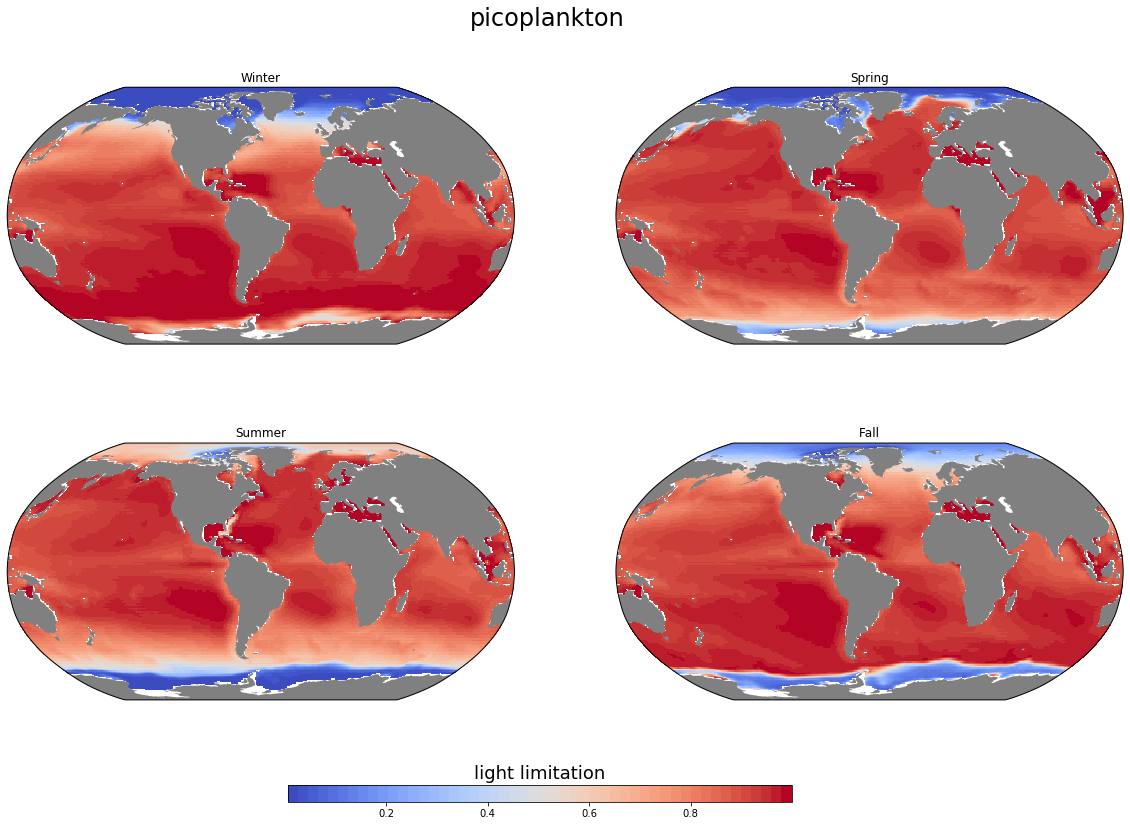

In [6]:
# levels
levels = [0, 0.9, 1.9,  2.9]
pal = plt.cm.get_cmap('coolwarm', 50)
# figure 
fig = plt.figure(figsize=(20, 12))
lat = ds.lat

# Winter 
ax = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson(central_longitude=305.0))
winter, lon = add_cyclic_point(np.nanmean(ds.pp_light_lim_surf[list(range(2)) + [-1]], axis=0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, winter, cmap=pal, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter')

# Spring 
ax1 = fig.add_subplot(2, 2, 2 , projection=ccrs.Robinson(central_longitude=305.0))
spring, lon = add_cyclic_point(np.nanmean(ds.pp_light_lim_surf[2:5,:,:],axis=0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, spring, cmap=pal, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('Spring')

# Summer 
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=305.0))
summer, lon = add_cyclic_point(np.nanmean(ds.pp_light_lim_surf[5:8,:,:], axis =0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, summer, cmap=pal, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer')

# Fall 
ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Robinson(central_longitude=305.0))
fall, lon = add_cyclic_point(np.nanmean(ds.pp_light_lim_surf[8:11,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, fall, cmap=pal, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Fall')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',orientation="horizontal")
cbar.ax.set_title('light limitation', fontsize = 18)
fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=24)

fig.savefig('light_limitation_pp_global.png')

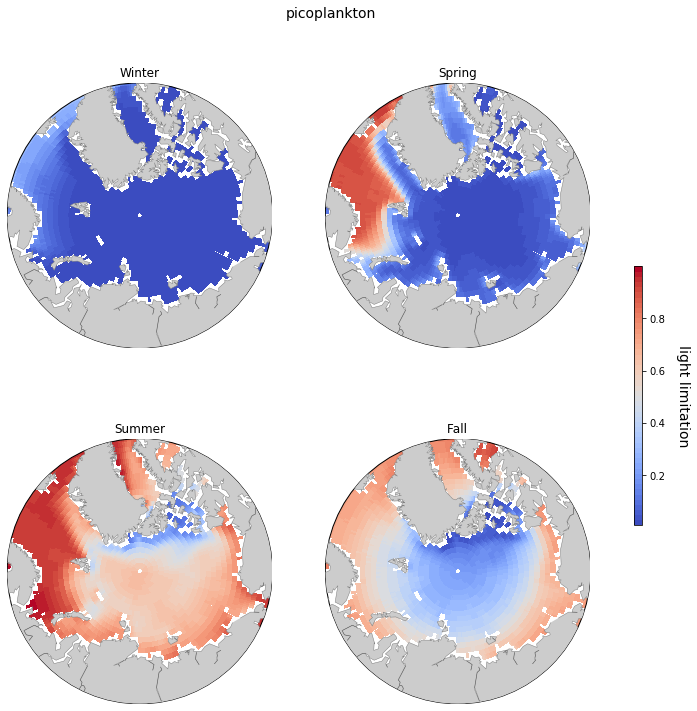

In [10]:
fig = plt.figure(figsize=(12,12))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# January
ax = fig.add_subplot(221) 
ax.set_title("Winter")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(ds.pp_light_lim_surf[list(range(2)) + [-1]], axis=0),shading='flat',cmap=pal)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(222) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(ds.pp_light_lim_surf[2:5, : ,:], axis=0),shading='flat',cmap=pal)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(223) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(ds.pp_light_lim_surf[5:8,:,:], axis=0),shading='flat',cmap=pal)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# January
ax = fig.add_subplot(224) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(ds.pp_light_lim_surf[8:10,:,:], axis=0),shading='flat',cmap=pal)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=14)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax, shrink=0.5, spacing='uniform')
cbar.ax.set_ylabel('light limitation', rotation=270,labelpad=25, fontsize = 14)
m.plot
plt.show()
fig.savefig('light_limitation_pp_ao.png')

# Temperature limitation 

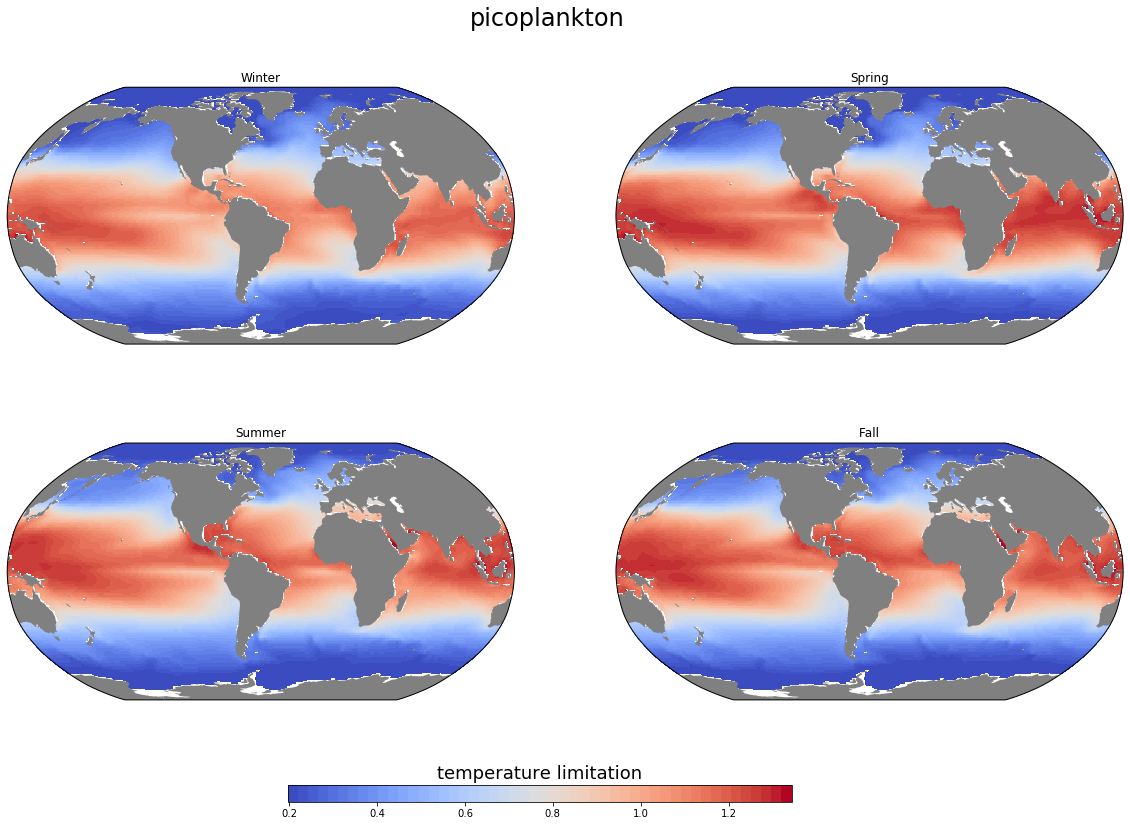

In [8]:
# levels
levels = [0, 0.9, 1.9,  2.9]
pal = plt.cm.get_cmap('coolwarm', 50)
# figure 
fig = plt.figure(figsize=(20, 12))
lat = ds.lat

# Winter 
ax = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson(central_longitude=305.0))
winter, lon = add_cyclic_point(np.nanmean(𝛾𝑇_pico[list(range(2)) + [-1],0,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, winter, cmap=pal, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter')

# Spring 
ax1 = fig.add_subplot(2, 2, 2 , projection=ccrs.Robinson(central_longitude=305.0))
spring, lon = add_cyclic_point(np.nanmean(𝛾𝑇_pico[2:5,0,:,:],axis=0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, spring, cmap=pal, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('Spring')

# Summer 
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=305.0))
summer, lon = add_cyclic_point(np.nanmean(𝛾𝑇_pico[5:8,0,:,:], axis =0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, summer, cmap=pal, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer')

# Fall 
ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Robinson(central_longitude=305.0))
fall, lon = add_cyclic_point(np.nanmean(𝛾𝑇_pico[8:11,0,:,:], axis=0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, fall, cmap=pal, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Fall')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',orientation="horizontal")
cbar.ax.set_title('temperature limitation', fontsize = 18)
fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=24)

fig.savefig('temp_limitation_pp_global.png')

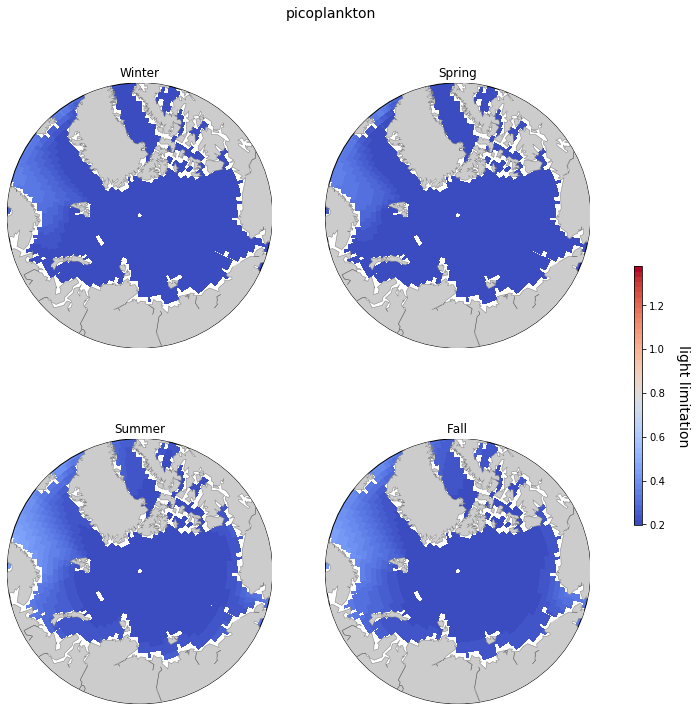

In [9]:
fig = plt.figure(figsize=(12,12))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# January
ax = fig.add_subplot(221) 
ax.set_title("Winter")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(𝛾𝑇_pico[list(range(2)) + [-1],0,:,:], axis=0),shading='flat',cmap=pal)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(222) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(𝛾𝑇_pico[2:5,0, : ,:], axis=0),shading='flat',cmap=pal)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(223) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(𝛾𝑇_pico[5:8,0,:,:], axis=0),shading='flat',cmap=pal)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# January
ax = fig.add_subplot(224) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(𝛾𝑇_pico[8:10,0,:,:], axis=0),shading='flat',cmap=pal)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=14)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax, shrink=0.5, spacing='uniform')
cbar.ax.set_ylabel('temperature limitation', rotation=270,labelpad=25, fontsize = 14)
m.plot
plt.show()
fig.savefig('temperature_limitation_pp_ao.png')

# Nutrient Limitation

In [12]:
pp_surf_nutrient.shape

(3, 12, 180, 360)

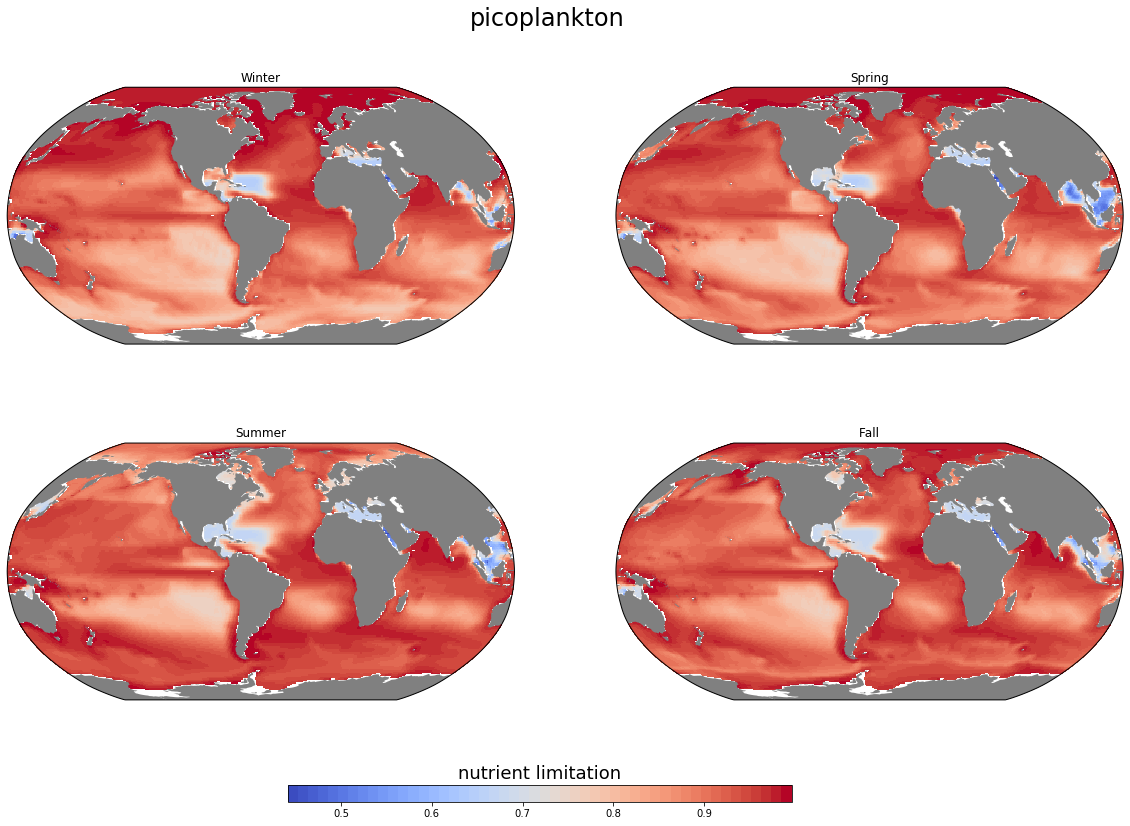

In [14]:
# levels
levels = [0, 0.9, 1.9,  2.9]
pal = plt.cm.get_cmap('coolwarm', 50)
# figure 
fig = plt.figure(figsize=(20, 12))
lat = ds.lat

# Winter 
ax = fig.add_subplot(2, 2, 1, projection=ccrs.Robinson(central_longitude=305.0))
winter, lon = add_cyclic_point(np.nanmean(pp_surf_nutrient[:,list(range(2)) + [-1],:,:], axis=(0,1)), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, winter, cmap=pal, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('Winter')

# Spring 
ax1 = fig.add_subplot(2, 2, 2 , projection=ccrs.Robinson(central_longitude=305.0))
spring, lon = add_cyclic_point(np.nanmean(pp_surf_nutrient[:,2:5,:,:],axis=(0,1)), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, spring, cmap=pal, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('Spring')

# Summer 
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=305.0))
summer, lon = add_cyclic_point(np.nanmean(pp_surf_nutrient[:,5:8,:,:], axis =(0,1)), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, summer, cmap=pal, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Summer')

# Fall 
ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Robinson(central_longitude=305.0))
fall, lon = add_cyclic_point(np.nanmean(pp_surf_nutrient[:,8:11,:,:], axis=(0,1)), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, fall, cmap=pal, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('Fall')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',orientation="horizontal")
cbar.ax.set_title('nutrient limitation', fontsize = 18)
fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=24)

fig.savefig('nutrient_limitation_pp_global.png')

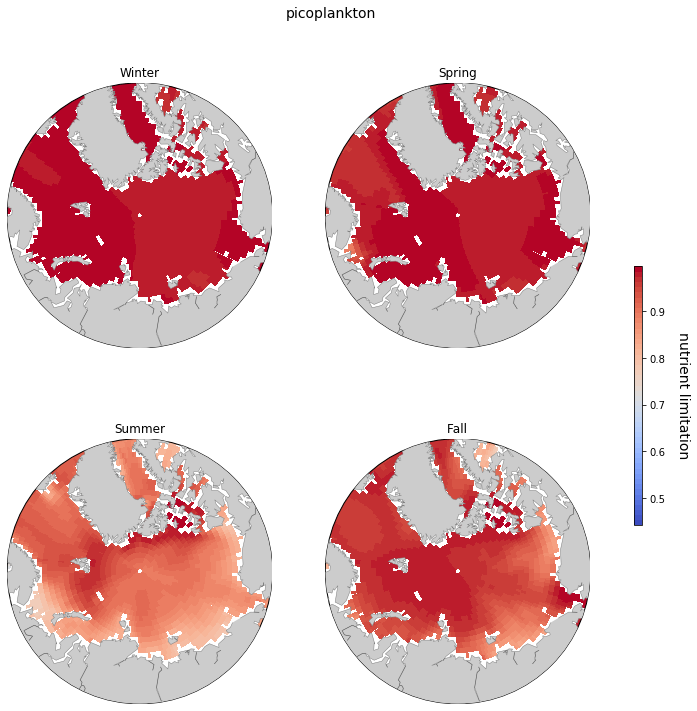

In [15]:
fig = plt.figure(figsize=(12,12))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# January
ax = fig.add_subplot(221) 
ax.set_title("Winter")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(pp_surf_nutrient[:,list(range(2)) + [-1],:,:], axis=(0,1)),shading='flat',cmap=pal)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(222) 
ax.set_title("Spring")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,np.nanmean(pp_surf_nutrient[:,2:5, : ,:], axis=(0,1)),shading='flat',cmap=pal)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(223) 
ax.set_title("Summer")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(pp_surf_nutrient[:,5:8,:,:], axis=(0,1)),shading='flat',cmap=pal)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# January
ax = fig.add_subplot(224) 
ax.set_title("Fall")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,np.nanmean(pp_surf_nutrient[:,8:10,:,:], axis=(0,1)),shading='flat',cmap=pal)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=14)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax, shrink=0.5, spacing='uniform')
cbar.ax.set_ylabel('nutrient limitation', rotation=270,labelpad=25, fontsize = 14)
m.plot
plt.show()
fig.savefig('nutrient_limitation_pp_ao.png')

### What I learned about this, is that do not make the values a nan if they are above 90%, but make them 0.9 maybe to be able to still show that those are highly limited by something? or maybe create something to igonre the nan's and not make that a zero 